<a href="https://colab.research.google.com/github/baschoff/Data-Science-Project/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation
## Datasets Used
  - Zillow: A dataset full of Zillow's "Zestimates" for houses, there approximation of house prices in each state measured monthly since January of 2000.
  - ComRealPri: Actual sell prices of real estate across the United States measured quarterly since January 2005
  - StickyPrice: A dataset containing the actual percentage of inflation gathered monthly since January 1968.
  - Inflation: An inflation index measured monthly since January 1947
  - PPI_Glass: Producer Price Index for glass starting measured monthly since December 2003
  - PPI_Lumber: Producer Price Index for lumber starting measured monthly since January 1926
  - PPI_Asphalt: Producer Price Index for Asphalt and Shingles, they are in the same dataset for some reason. measured monthly since December 1975
  - PPI_Cement: Producer Price Index for Cement and Concrete, these make sense in the same dataset, measured monthly since December 2003
  - PPI_Plumbing: Producer Price Index for Plumbing Materials, measured monthly since January 1947
  - PPI_Metals:  Producer Price Index for all metals measured monthly since December 2010

## Importing
Below is our code to import and load all of our datasets from GitHub as well as rename some of there random columns to something meaningful to us.

In [28]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

!git clone https://github.com/baschoff/Data-Science-Project.git

Zillow = pd.read_csv('/content/Data-Science-Project/Datasets/ZHVI.csv')
ComRealPri = pd.read_csv('/content/Data-Science-Project/Datasets/Commercial Real Estate.csv')
StickyPrice = pd.read_csv('/content/Data-Science-Project/Datasets/Sticky Price.csv')
Inflation = pd.read_csv('/content/Data-Science-Project/Datasets/US_inflation_rates.csv')
PPI_Glass = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Glass.csv')
PPI_Lumber = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Lumber.csv')
PPI_Asphalt = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Asphalt+Shingles.csv')
PPI_Cement = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Cement+Concrete.csv')
PPI_Plumbing = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Plumbing.csv')
PPI_Metals = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Metal.csv')

PPI_Glass.rename(columns = {"PCU3272132721": "Price"}, inplace = True)
PPI_Lumber.rename(columns = {"WPU08": "Price"}, inplace = True)
PPI_Asphalt.rename(columns = {"PCU324122324122": "Price"}, inplace = True)
PPI_Cement.rename(columns = {"PCU32733273": "Price"}, inplace = True)
PPI_Plumbing.rename(columns = {"PCU332913332913": "Price"}, inplace = True)
PPI_Metals.rename(columns = {"WPU10170502": "Price"}, inplace = True)
StickyPrice.rename(columns = {"CORESTICKM159SFRBATL" : "Value"}, inplace = True)
ComRealPri.rename(columns = {"COMREPUSQ159N" : "Value"}, inplace = True)
Zillow.rename(columns = {"Unnamed: 0": "Date"}, inplace = True)

cN = PPI_Glass.columns.tolist()
cN1 = PPI_Lumber.columns.tolist()
cN2 = PPI_Asphalt.columns.tolist()
cN3 = PPI_Cement.columns.tolist()
cN4 = PPI_Plumbing.columns.tolist()
cN5 = PPI_Metals.columns.tolist()
cN6 = Inflation.columns.tolist()
cN7 = StickyPrice.columns.tolist()
cN8 = ComRealPri.columns.tolist()
cN9 = Zillow.columns.tolist()

#print(PPI_Cement) #Debugging Print Statement

fatal: destination path 'Data-Science-Project' already exists and is not an empty directory.
           DATE    Price
0    2003-12-01  100.000
1    2004-01-01  100.900
2    2004-02-01  101.700
3    2004-03-01  101.700
4    2004-04-01  102.400
..          ...      ...
245  2024-05-01  246.860
246  2024-06-01  246.351
247  2024-07-01  246.889
248  2024-08-01  248.209
249  2024-09-01  248.844

[250 rows x 2 columns]


# (1) Linear Regression ***Describe your code in the text cell for these please***
Our first step in evaluation is for us to develop a linear regression model using two attributes. The attributes we've chosen are ***INSERT ATTRIBUTES***. We will also measure the performance of the model to ensure it has high performance. We will draw a plot using matplotlib. Lastly, we will calculate and show our loss functions: mean squared error, root mean squared error, and mean absolute error.

## Glass Price Index vs StickyPrice
The following graph shows how glass prices compare to inflation from our StickyPrice dataset. However unlike most of our other data, StickPrice is not an index of inflation, it's the actual percentage, so the comparison is very sloppy.

Text(0, 0.5, 'Glass Price Index')

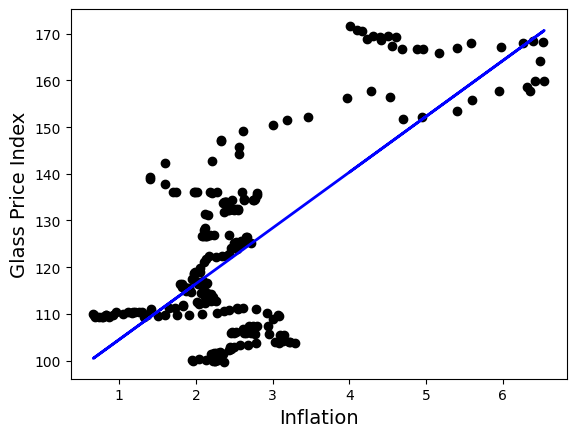

In [2]:
# The uses inflation as a percentage not an index so this is just an example and not a proper comparison

# Store relevant columns as variables
StickyPrice1 = StickyPrice[StickyPrice[cN7[0]] >= "2003-12-01"]
X = StickyPrice1[[cN7[1]]].values.reshape(-1, 1)
y = PPI_Glass[[cN[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation', fontsize=14)
plt.ylabel('Glass Price Index', fontsize=14)

## Glass Price Index vs Inflation
This one lines up much better, and shows that glass prices in this context, are strongly linked to inflation.

Text(0, 0.5, 'Glass Price Index')

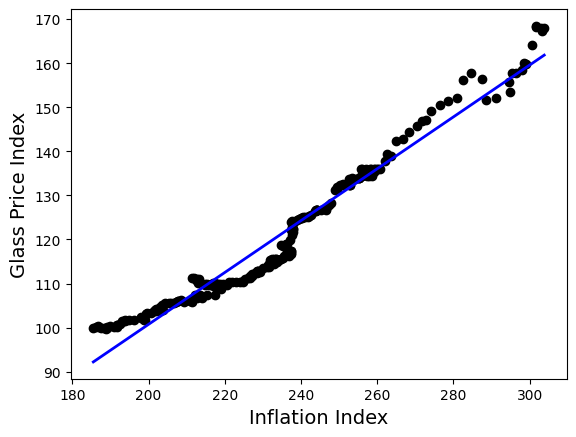

In [3]:
# Store relevant columns as variables
Inflation1 = Inflation[Inflation[cN6[0]] >= "2003-12-01"]
PPI_Glass1 = PPI_Glass[PPI_Glass[cN[0]] <= "2023-06-01"]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Glass1[[cN[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Glass Price Index', fontsize=14)

## Lumber vs Inflation
We have more than just glass, let's compare lumber prices to inflation. It seems to align quite well.

Text(0, 0.5, 'Lumber Price Index')

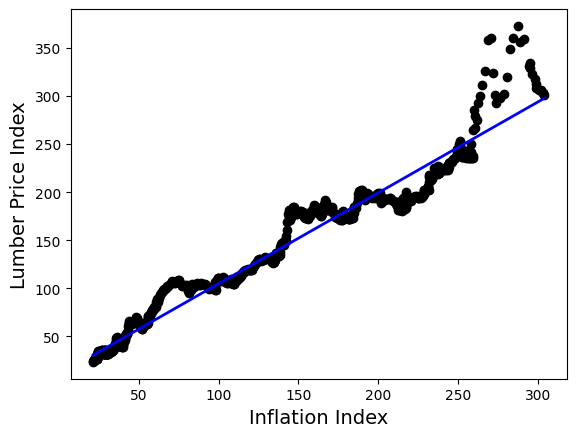

In [4]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] <= "2023-06-01") & (Inflation[cN6[0]] >= "1947-01-01")] # Select data within the specified date range
PPI_Lumber1 = PPI_Lumber[(PPI_Lumber[cN[0]] <= "2023-06-01") & (PPI_Lumber[cN[0]] >= "1947-01-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Lumber1[[cN1[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Lumber Price Index', fontsize=14)

## Asphalt & Shingles vs Inflation
This one had quite the dip.

Text(0, 0.5, 'Asphalt Price Index')

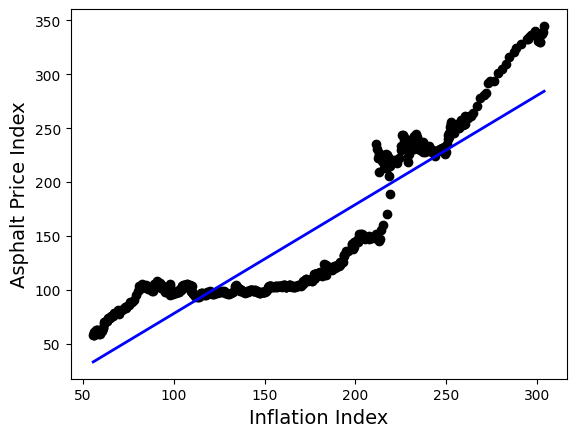

In [5]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] >= "1975-12-01")]
PPI_Asphalt1 = PPI_Asphalt[(PPI_Asphalt[cN2[0]] <= "2023-06-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Asphalt1[[cN2[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Asphalt Price Index', fontsize=14)

## Cement & Concrete vs Inflation ***FILL IN***

Text(0, 0.5, 'Cement Price Index')

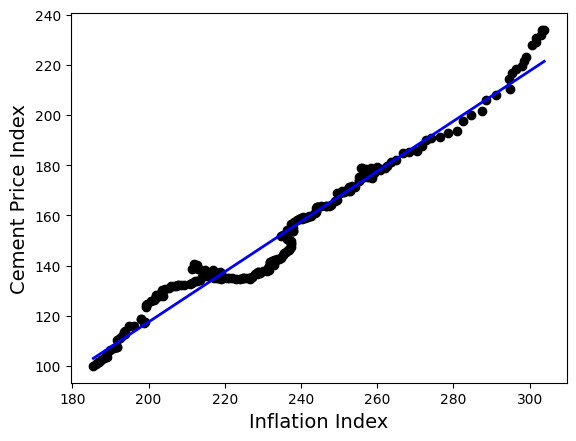

In [6]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] >= "2003-12-01")]
PPI_Cement1 = PPI_Cement[(PPI_Cement[cN3[0]] <= "2023-06-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Cement1[[cN3[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Cement Price Index', fontsize=14)

## Metal vs Inflation ***FILL IN***

Text(0, 0.5, 'Metals Price Index')

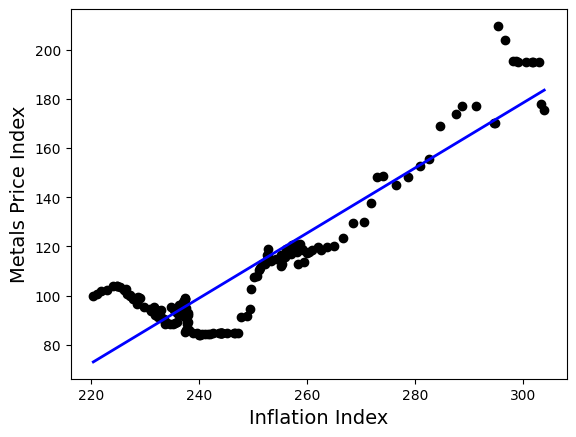

In [7]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] <= "2023-06-01") & (Inflation[cN6[0]] >= "2010-12-01")]
PPI_Metals1 = PPI_Metals[(PPI_Metals[cN5[0]] <= "2023-06-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Metals1[[cN5[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Metals Price Index', fontsize=14)

# (2) Multiple Linear Regression
Our second step is to create a multiple linear regression model using multiple attributes. We will go over the attributes used before each of there respectives secions. We will also measure the models performance. We will plot these using mplot3d to show the observed and predicted values from the model. Lastly, we will calculate the loss functions: mean squared error, root mean squared error, and mean absolure error.

## The Regression
The code below is the bulk of this section, as I set up everything for the remaining plots within it. First I created "dummy" datasets to mess with to leave the originals untouched, I then made it dummy datasets first column name consistent and converted it to datetime format. I then combined all of these datesets into a single new dataset, ensuring the dates stayed properly aligned. I then chopped everything before 2010 from the dataset, because our dataset that began gathering data the latest is the metal's dataset, which began 12-01-2010. Although I don't believe there was any NaN data remaining, I still did use a interpolation technique to fill in missing values. I then split the dates from our combined dataset to place them into our 'y' for regression. I then split the data into test and train, and trained the model. Before the graph I went ahead and calculated our performance data. Then finaly I graphed specifically Lumber cost and Glass cost against Inflation in a 3D plot.

In [8]:
#First I copied the original dataframes into one that I will edit
#Then I renamed the columns of these dataframes to prevent overlap
#Lastly for each frame I also ensured the Date columns is dtype datetime

Glass = PPI_Glass
Glass.rename(columns = {"DATE": "Date", 'Price': 'Glass$'}, inplace = True)
Glass['Date'] = pd.to_datetime(Glass['Date'])

Lumber = PPI_Lumber
Lumber.rename(columns = {"DATE": "Date", 'Price': 'Lumber$'}, inplace = True)
Lumber['Date'] = pd.to_datetime(Lumber['Date'])


Asphalt = PPI_Asphalt
Asphalt.rename(columns = {"DATE": "Date", 'Price': 'Asphalt$'}, inplace = True)
Asphalt['Date'] = pd.to_datetime(Asphalt['Date'])


Cement = PPI_Cement
Cement.rename(columns = {"DATE": "Date", 'Price': 'Cement$'}, inplace = True)
Cement['Date'] = pd.to_datetime(Cement['Date'])


Metals = PPI_Metals
Metals.rename(columns = {"DATE": "Date", 'Price': 'Metals$'}, inplace = True)
Metals['Date'] = pd.to_datetime(Metals['Date'])


Plumbing = PPI_Plumbing
Plumbing.rename(columns = {"DATE": "Date", 'Price': 'Plumbing$'}, inplace = True)
Plumbing['Date'] = pd.to_datetime(Plumbing['Date'])

InflationIndex = Inflation
InflationIndex.rename(columns = {"date": "Date", 'value': 'InflationIndex'}, inplace = True)
InflationIndex['Date'] = pd.to_datetime(InflationIndex['Date'])

#Now I combined all of the above dataframes into a single dataframe so that I could more easily, re-size and align values
PPI_All = [Glass, Lumber, Asphalt, Cement, Metals, Plumbing, InflationIndex]
PPI_AllMerg = reduce(lambda left, right: pd.merge(left, right, on=['Date'], how='outer'), PPI_All)
PPI_AllMerg.set_index('Date', inplace=True)

#The metals dataframe starts recording at the latest point, so I chopped everything before 2010-12-01, which is when the first entry in metals is
PPI_AllMerg = PPI_AllMerg[PPI_AllMerg.index >= pd.to_datetime('2010-12-01')]

#Filling in any missing values between datasets using interpolation
for column in PPI_AllMerg.columns:
    if column != 'Date':
        PPI_AllMerg[column] = PPI_AllMerg[column].interpolate(method='time')

#Now splitting into two frames for our linear model
X = PPI_AllMerg[['Glass$', 'Lumber$', 'Asphalt$', 'Cement$', 'Metals$', 'Plumbing$']]
y = PPI_AllMerg['InflationIndex']

#Setting up the linear model
linmodel = linear_model.LinearRegression()
#Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Actually fitting the model
linmodel.fit(X_train, y_train)

#Prediction
y_pred = linmodel.predict(X_test)

#Performance Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Printion out my performance evaluation
print(f"R-squared:               {r2}")
print(f"Mean Squared Error:      {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error:     {mae}")

print("The R^2, MSE, RMSE, and MAE all show strong model performance")

R-squared:               0.9963834389686603
Mean Squared Error:      1.8851851370901358
Root Mean Squared Error: 1.3730204430707271
Mean Absolute Error:     1.195165485372508
The R^2, MSE, RMSE, and MAE all show strong model performance


## Lumber & Glass vs Inflation
Finally showing off some plots from all of our above code

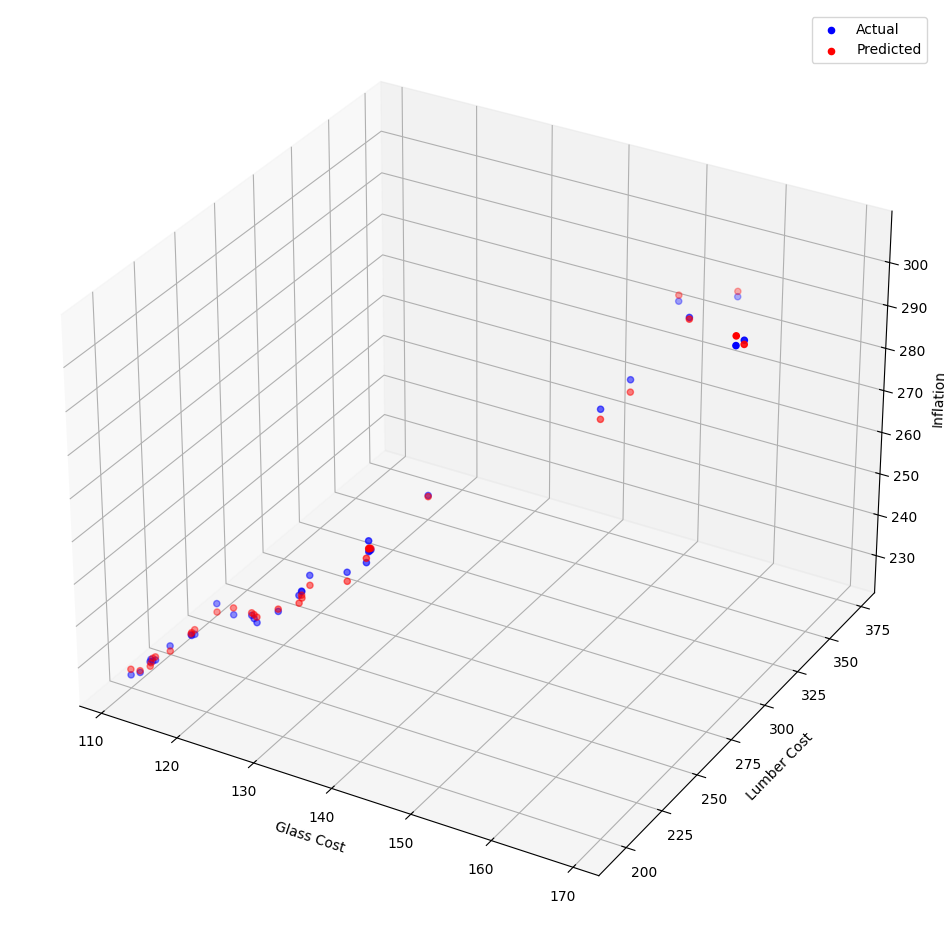

In [9]:
#Setting up the 3D plot
fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Glass$'], X_test['Lumber$'], y_test, c='blue', marker='o', label='Actual')
ax.scatter(X_test['Glass$'], X_test['Lumber$'], y_pred, c='red', marker='o', label='Predicted')
ax.set_xlabel('Glass Cost')
ax.set_ylabel('Lumber Cost')
ax.set_zlabel('Inflation')
ax.legend()

plt.show()

## Asphalt & Cement vs Inflation
More graphs

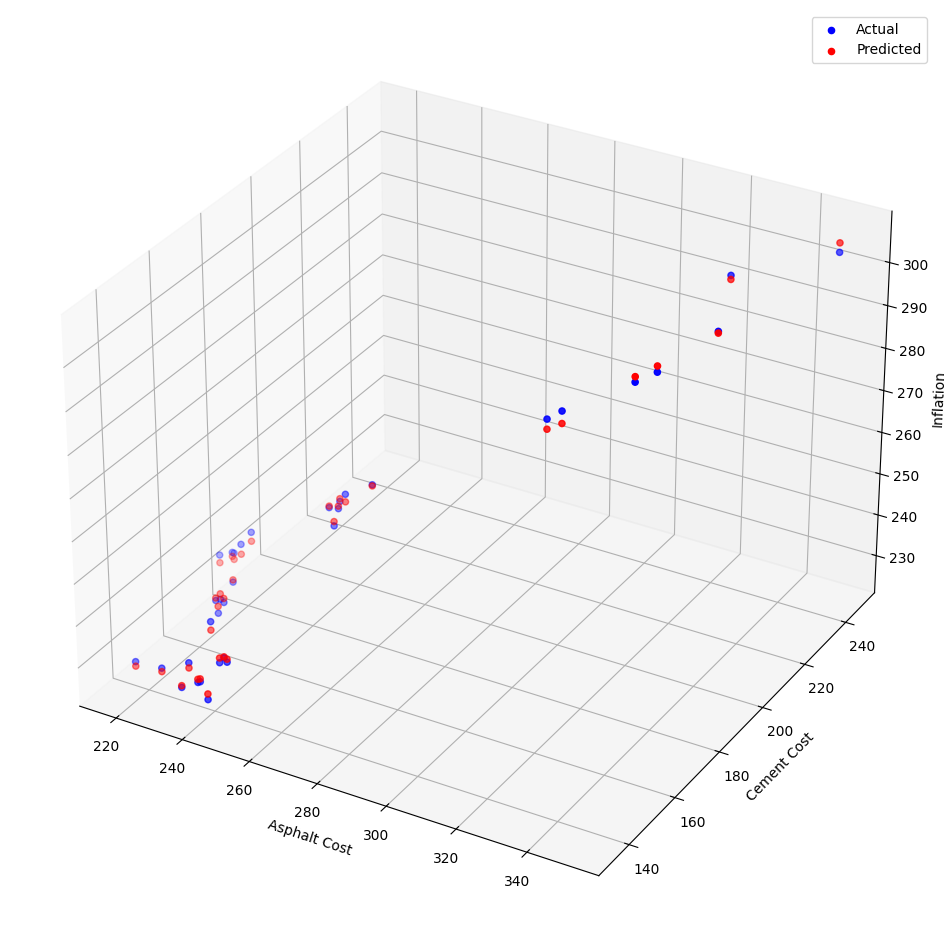

In [10]:
fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Asphalt$'], X_test['Cement$'], y_test, c='blue', marker='o', label='Actual')
ax.scatter(X_test['Asphalt$'], X_test['Cement$'], y_pred, c='red', marker='o', label='Predicted')
ax.set_xlabel('Asphalt Cost')
ax.set_ylabel('Cement Cost')
ax.set_zlabel('Inflation')
ax.legend()

plt.show()

## Metals & Plumbing vs Inflation
Our last 3D graph for this notebook

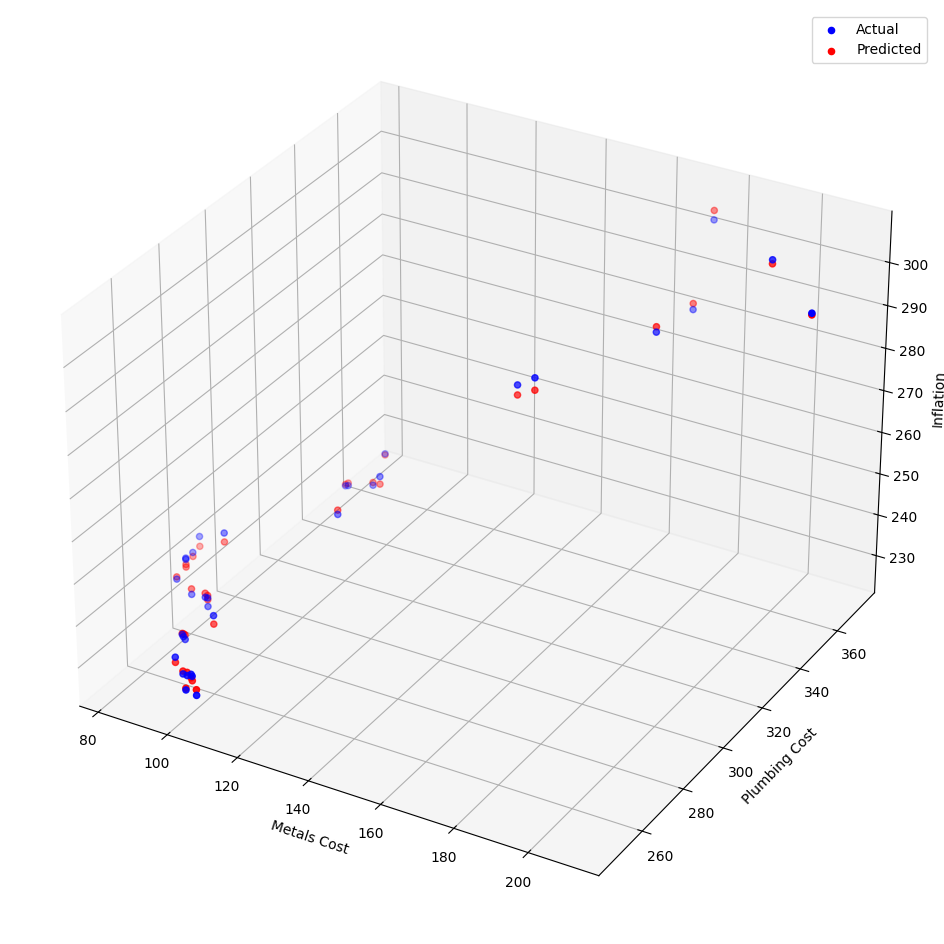

In [11]:
fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Metals$'], X_test['Plumbing$'], y_test, c='blue', marker='o', label='Actual')
ax.scatter(X_test['Metals$'], X_test['Plumbing$'], y_pred, c='red', marker='o', label='Predicted')
ax.set_xlabel('Metals Cost')
ax.set_ylabel('Plumbing Cost')
ax.set_zlabel('Inflation')
ax.legend()

plt.show()

# (3) Logistic Regression
For our third step, we will create a logistical regression. We will measure it's performance and draw a plot using matplotlib to show our observed and predicted values. Lastly, we will report our absolute loss and log loss.

## Logistical Model Code
First I created a new dataset PerChan (Percent Chance), I calculated the percent change in price from point to point across the datsets, then summed them all up to get an overall percentage price change for all materials. Then the logistical model is focused on whether price increased or decreased. Since this included all of our material data, there is only one graph.

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.82      0.90      0.86        10

    accuracy                           0.91        34
   macro avg       0.89      0.91      0.90        34
weighted avg       0.92      0.91      0.91        34

The only score I am somewhat dissapointed in is my f1-score, the others all being above 90 indidcates high enough performance to me


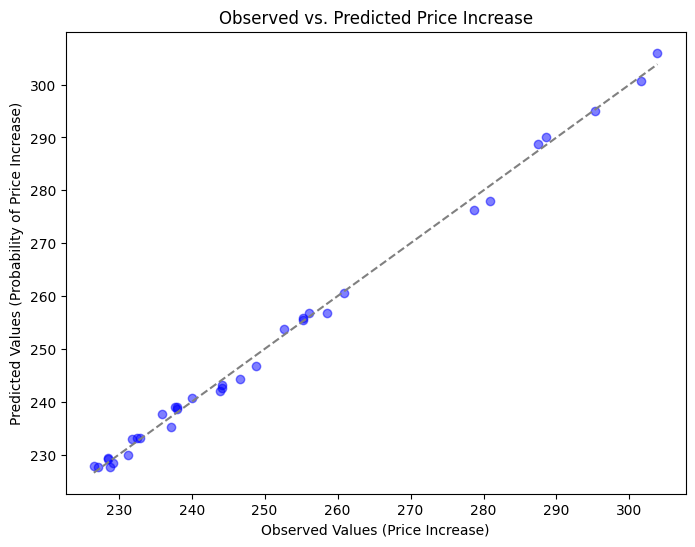

              Glass$   Lumber$  Asphalt$   Cement$   Metals$  Plumbing$  \
Date                                                                      
2010-12-01  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
2011-01-01  0.546946  1.150628 -0.362976  0.074129  0.700000   0.333056   
2011-02-01  0.090662  0.672182  0.500911 -0.074074  1.092354   0.539419   
2011-03-01 -0.090580  0.564972 -1.178070 -0.148258  0.589391   0.701610   
2011-04-01  0.000000 -0.102145  1.879872 -0.074239  1.562500   0.491803   
...              ...       ...       ...       ...       ...        ...   
2024-05-01  0.424866 -0.837988  2.487898  0.019853  0.000000   0.257942   
2024-06-01 -0.332200 -0.150857 -0.544429 -0.206190  0.000000   0.207657   
2024-07-01  1.056757 -0.549246  0.354760  0.218388  0.000000   0.000000   
2024-08-01  0.118338  0.313015 -1.134176  0.534653  0.000000   0.000000   
2024-09-01  0.459333  0.257830  0.845432  0.255833  0.000000   0.000000   

            InflationInd

In [13]:
PerChan = PPI_AllMerg.copy()
PerChan['Glass$'] = PerChan['Glass$'].pct_change() * 100
PerChan['Lumber$'] = PerChan['Lumber$'].pct_change() * 100
PerChan['Asphalt$'] = PerChan['Asphalt$'].pct_change() * 100
PerChan['Cement$'] = PerChan['Cement$'].pct_change() * 100
PerChan['Metals$'] = PerChan['Metals$'].pct_change() * 100
PerChan['Plumbing$'] = PerChan['Plumbing$'].pct_change() * 100
PerChan['InflationIndex'] = PerChan['InflationIndex'].pct_change() * 100

PerChan = PerChan.fillna(0)

material_columns = [col for col in PerChan.columns if col != 'Date']
PerChan['Overall%Δ'] = PerChan[material_columns].sum(axis=1)

PerChan['price_increase'] = (PerChan['Overall%Δ'] > 2).astype(int)
Xlog = PerChan[['Glass$', 'Lumber$', 'Asphalt$', 'Cement$', 'Metals$', 'Plumbing$']]
ylog = PerChan['price_increase']

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog, test_size=0.2, random_state=42)
logmodel = linear_model.LogisticRegression()
logmodel.fit(Xlog_train, ylog_train)

ylog_pred = logmodel.predict(Xlog_test)

accuracy = accuracy_score(ylog_test, ylog_pred)
report = classification_report(ylog_test, ylog_pred)
print(report)
print("The only score I am somewhat dissapointed in is my f1-score, the others all being above 90 indidcates high enough performance to me")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.xlabel("Observed Values (Price Increase)")
plt.ylabel("Predicted Values (Probability of Price Increase)")
plt.title("Observed vs. Predicted Price Increase")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')

plt.show()
#print(PerChan)

# Conclusion
The logistical model is showing good results at predicting price increases, although the relationship is still linear.
The Multiple Linear Regression model also showed promising results in it's performance and generated graphs.